In [15]:
# Dependencies
import requests, pprint
import json, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from config import hc_api_key
#from config import hc_api_secret

In [16]:
url = "https://api.housecanary.com/v2/metrodiv/hpi_ts_historical"


In [17]:
params = {'metrodiv':'11244'}

response = requests.get(url,params = params, auth=("IC4ZXEU6EJIXX9U724LR", "PHQf5YY0WTJNkbWWK2NnTp7ZKzLvFmGC")) 
response = response.json()

print(json.dumps(response, indent=4))

[
    {
        "metrodiv/hpi_ts_historical": {
            "api_code_description": "ok",
            "api_code": 0,
            "result": {
                "time_series": [
                    {
                        "hpi_trend": 7.495035,
                        "hpi_distance": 0.403356,
                        "hpi_real": 61.925333,
                        "hpi_value": 19.79057,
                        "month": "1976-01-01"
                    },
                    {
                        "hpi_trend": 7.935253,
                        "hpi_distance": 0.396878,
                        "hpi_real": 62.543431,
                        "hpi_value": 20.023928,
                        "month": "1976-02-01"
                    },
                    {
                        "hpi_trend": 8.375471,
                        "hpi_distance": 0.391471,
                        "hpi_real": 63.257367,
                        "hpi_value": 20.288732,
                        "month": "1976-03-01"
 

In [37]:
#lookup by the metro area 
# params = {'metrodiv':'11244'}

# response = requests.get(url,params = params, auth=("", "")) 
# response = response.json()

# print(json.dumps(response, indent=4))


[
    {
        "metrodiv/hpi_ts_historical": {
            "api_code_description": "ok",
            "api_code": 0,
            "result": {
                "time_series": [
                    {
                        "hpi_trend": 7.495035,
                        "hpi_distance": 0.403356,
                        "hpi_real": 61.925333,
                        "hpi_value": 19.79057,
                        "month": "1976-01-01"
                    },
                    {
                        "hpi_trend": 7.935253,
                        "hpi_distance": 0.396878,
                        "hpi_real": 62.543431,
                        "hpi_value": 20.023928,
                        "month": "1976-02-01"
                    },
                    {
                        "hpi_trend": 8.375471,
                        "hpi_distance": 0.391471,
                        "hpi_real": 63.257367,
                        "hpi_value": 20.288732,
                        "month": "1976-03-01"
 

In [3]:
month= []
hpi_trend =[]
hpi_value=[]
hpi_distance=[]
hpi_real=[]


In [18]:
housing_frame = pd.DataFrame(response[0]['metrodiv/hpi_ts_historical']['result']['time_series'])

In [74]:
housing_frame.to_csv('Resources/House_Price_Index_Orange.csv')

In [19]:
housing_frame.head()

,hpi_distance,hpi_real,hpi_trend,hpi_value,month
0,0.403356,61.925333,7.495035,19.790570,1976-01-01
1,0.396878,62.543431,7.935253,20.023928,1976-02-01
2,0.391471,63.257367,8.375471,20.288732,1976-03-01
3,0.387942,64.152714,8.815690,20.612642,1976-04-01
4,0.385485,64.927928,9.255908,20.973282,1976-05-01


In [20]:
housing_frame['year'] = pd.to_datetime(housing_frame['month']).dt.year

In [21]:
# function for setting chart properties

def chart_propoerties (x,y, value):
    fig,ax = plt.subplots()
    ax = plt.plot(x=x,y=y)

    plt.title(f"{value}" )
    plt.xlabel('Year')
    plt.ylabel('hpi_value')
    plt.grid()
    plt.savefig(f'output/{value}.png')
    plt.show()

In [54]:
recent_data = housing_frame.loc[housing_frame['year'] > 2007, :]
recent_data.head()

,hpi_distance,hpi_real,hpi_trend,hpi_value,month,year
384,1.250118,179.363746,176.538773,217.962907,2008-01-01,2008
385,1.036191,173.599162,176.978991,211.467840,2008-02-01,2008
386,0.833539,167.950415,177.419209,205.318901,2008-03-01,2008
387,0.656779,163.190738,177.859427,199.961930,2008-04-01,2008
388,0.505826,158.551335,178.299645,195.426780,2008-05-01,2008


In [41]:
recent_data = recent_data.set_index('year')
recent_data.head()

,hpi_distance,hpi_real,hpi_trend,hpi_value,month
year,,,,,
2008,1.250118,179.363746,176.538773,217.962907,2008-01-01
2008,1.036191,173.599162,176.978991,211.467840,2008-02-01
2008,0.833539,167.950415,177.419209,205.318901,2008-03-01
2008,0.656779,163.190738,177.859427,199.961930,2008-04-01
2008,0.505826,158.551335,178.299645,195.426780,2008-05-01


In [42]:
group_data = recent_data.groupby('year')
group_data = group_data['hpi_value'].mean().round()
group_data.head()

year
2008    192.0
2009    162.0
2010    163.0
2011    153.0
2012    152.0
Name: hpi_value, dtype: float64

In [43]:
recent_data['rolling_mean']= recent_data['hpi_value'].rolling(window=2).mean()

recent_data.head()

,hpi_distance,hpi_real,hpi_trend,hpi_value,month,rolling_mean
year,,,,,,
2008,1.250118,179.363746,176.538773,217.962907,2008-01-01,NaN
2008,1.036191,173.599162,176.978991,211.467840,2008-02-01,214.715373
2008,0.833539,167.950415,177.419209,205.318901,2008-03-01,208.393371
2008,0.656779,163.190738,177.859427,199.961930,2008-04-01,202.640416
2008,0.505826,158.551335,178.299645,195.426780,2008-05-01,197.694355


In [44]:
years = group_data.keys()
print(years)

y_axis = group_data.values
y_axis

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype='int64', name='year')


array([192., 162., 163., 153., 152., 177., 197., 208., 222., 238., 253.])

In [30]:
group_data.head()

year
2008    192.0
2009    162.0
2010    163.0
2011    153.0
2012    152.0
Name: hpi_value, dtype: float64

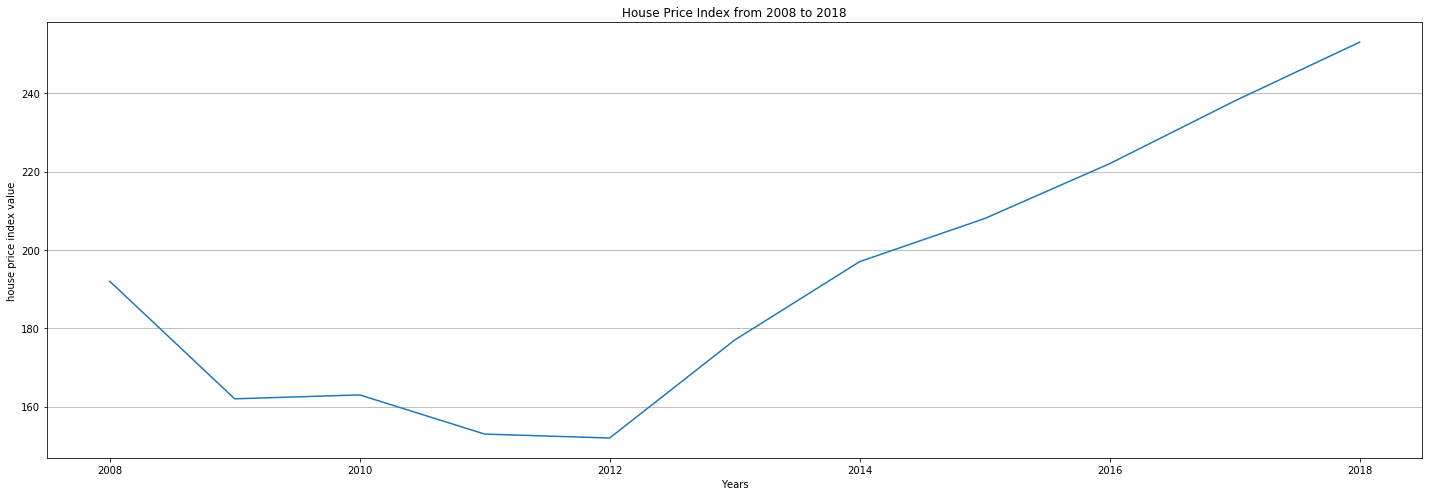

In [60]:
plt.figure(figsize=(20,7))
plt.title( 'House Price Index from 2008 to 2018')
plt.plot(years, y_axis)
plt.xlabel('Years')
plt.ylabel('house price index value')
plt.grid(axis='y')
plt.tight_layout()

